In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
X=dataset.iloc[:,0:-1]
Y=dataset.iloc[:,-1]
print(X)

            Position  Level
0   Business Analyst      1
1  Junior Consultant      2
2  Senior Consultant      3
3            Manager      4
4    Country Manager      5
5     Region Manager      6
6            Partner      7
7     Senior Partner      8
8            C-level      9
9                CEO     10


In [3]:
X=X.iloc[:,1:2]

In [4]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
X=np.array(X)
Y=np.array(Y)
linreg.fit(X.reshape(-1,1), Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=2)
X_poly=polyreg.fit_transform(X)

In [9]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [10]:
X_poly=np.array(X_poly)

In [11]:
polylinreg=LinearRegression()
polylinreg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

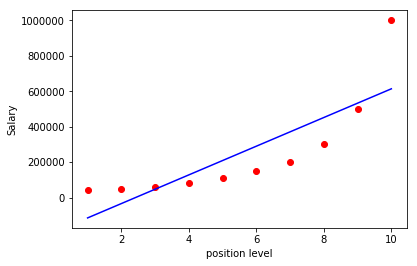

In [13]:
#Linear Regression Visualization
plt.scatter(X,Y, color='red')
plt.plot(X, linreg.predict(X), color= 'blue')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

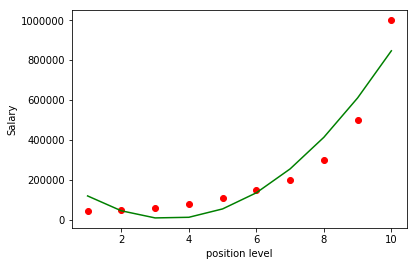

In [14]:
#Polynomial regression visualization
plt.scatter(X,Y, color='red')
plt.plot(X, polylinreg.predict(X_poly), color='green')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()

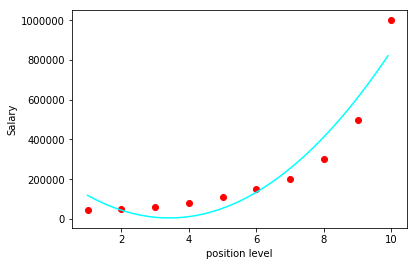

In [18]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y, color='red')
plt.plot(X_grid, polylinreg.predict(polyreg.fit_transform(X_grid)), color='cyan')
plt.xlabel('position level')
plt.ylabel('Salary')
plt.show()


In [19]:
#pedicting linear regression
print(linreg.predict(6.5))

[330378.78787879]


In [20]:
#predicting polynolial regression
print(polylinreg.predict(polyreg.fit_transform(6.5)))

[189498.10606061]
